# CSCI 3202, Spring 2020: Practicum

---


This practicum is due on Moodle by **11:59 PM on Friday May 1 2020**.  Your solutions to theoretical questions should be done in Markdown/LateX directly below the associated question. Your solutions to computational questions should include any relevant Python code, as well as results and any written commentary.

**The rules:**

1. All work, code and analysis must be **your own**.
1. You may use your course notes, posted lecture slides, textbook, in-class notebooks and homework solutions as resources.  You may also search online for answers to general knowledge questions, like the form of a probability distribution function, or how to perform a particular operation in Python.
1. You may **not** post to message boards or other online resources asking for help.
1. **You may not collaborate with classmates or anyone else.**
1. This is meant to be like a coding portion of your final exam. So, I will be much less helpful than I typically am with homework. For example, I will not check answers, help debug your code, and so on.
1. If you have a question, post it first as a **private** Piazza message. If I decide that it is appropriate for the entire class, then I will make it a public post (and anonymous).
1. If something is left open-ended, it is probably because I intend for you to code it up however you want, and only care about the plots/analysis I see at the end. Feel free to ask clarifying questions though.

Violation of these rules will result in an **F** and a trip to the Honor Code council.

---
**By writing your name below, you agree to abide by these rules:**

**Your name:** Angel Santana Hernandez

---


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors

---
## [50 pts] Problem 1:  Route-finding

Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$ with the **shortest total path length**. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

Print to the screen the output for `adjacent_states((1,15))`.

In [8]:
#create the map
def mapLocations():#function to store our map obstacle locations 
    map_locations = [(5,1), (6,1), (7,1), (8,1), (9,1), (10,1), (11,1), (12,1), (13,1), (14,1),
                     (15,1),(16,1), (17,1),(18,1), (19,1), (20,1), (21,1), (22,1), (23,1),(21,11),
                     (22,11), (23,11), (24,11), (25,11), (1,12), (2,12), (3,12), (10,12), (11,12), 
                     (12,12), (13,12),(14, 12), (21, 12), (22, 12), (23, 12), (24, 12), (25, 12), 
                     (1,13), (2,13), (11,13), (12,13), (13,13),(1,2), (1,3), (2,3), (1,4), (2,4),
                     (3,4), (1,5), (2,5),(3,5), (4,5), (1,6), (2,6), (3,6), (4,6), (1,7), (2,7), 
                     (3,7),(12,10), (13,10), (1,11), (2,11), (3,11), (4,11), (10,11), (11,11), (12,11),
                     (13,11), (14,11), (14,13), (21,13), (22,13), (23,13), (24,13), (25,13), (1,14),
                     (11,14), (12,14), (13,14), (14,14),(21,14), (22,14), (23,14), (24,14), (25,14),
                     (21,15), (22,15), (23,15), (24,15), (25,15), (21,16),(22,16), (23,16), (24,16),
                     (25,16),(4,7), (1,8), (2,8), (3,8), (4,8), (1,9),(2,9), (3,9), (4,9), (10,9), 
                     (11,9), (12,9), (13,9), (1,10), (2,10), (3,10), (4,10), (10,10), 
                     (11,10)]

    return map_locations
def adjacent_states(state):
    
    Map = mapLocations()#initialize our map obstacles
    
    #initialize our row and columns 
    row, col = state[0], state[1]
    
    #create a list to append adjacent state
    adjacentStates = []
    
    #intialize our forward, down, left, and right moves
    forward = (row, col + 1)
    down = (row, col - 1)
    left = (row - 1, col)
    right = (row + 1, col)
    
    #initialize the cost
    cost = 1 #for these movements cost is 1
    
    #check for the possible moves making sure not running into obstacles 
        #if it is possible, append them to our adjacent list 
        # along with appending the direction, we will also 
        # append the cost
    
    if(forward[1] <= 16 and forward not in Map):
        adjacentStates.append((forward, cost))
    if(down[1] >= 1 and down not in Map): 
        adjacentStates.append((down, cost))
    if(left[0] >= 1 and left not in Map):
        adjacentStates.append((left, cost)) 
    if(right[0] <= 25 and right not in Map):
        adjacentStates.append((right, cost))
    
    #now we will initialize our diagnol movements
    top_right = (row + 1, col + 1)
    top_left = (row - 1, col + 1)
    bottom_right = (row + 1, col - 1)
    bottom_left = (row - 1, col - 1)
    
    #initialize cost
    cost2 = np.sqrt(2)  #for these moves the cost is np.sqrt(2)
    
    #check for the possible diagnol directions making sure not running into obstacles
        #if is is possible, append them to our adjacent list
        # along with appending the direction, we will also 
        # append the cost, for diagnol movements 
    if(top_right[0] <= 25 and top_right[1] <= 16 and top_right not in Map):
        adjacentStates.append((top_right, cost2))
    if(top_left[0] >= 1 and top_left[1] <= 16 and top_left not in Map):
        adjacentStates.append((top_left, cost2))
    if(bottom_right[0] <= 25 and bottom_right[1] >= 1 and bottom_right not in Map):
        adjacentStates.append((bottom_right, cost2))
    if(bottom_left[0] >= 1 and bottom_left[1] >= 1 and bottom_left not in Map):
        adjacentStates.append((bottom_left, cost2))
    
    #return the adject States
    return adjacentStates



#test our function
test_adjacent_states = adjacent_states((1, 15))
print("Adjacent States for (1, 15) and its cost:\n","\n".join(map(str, test_adjacent_states)))
    

Adjacent States for (1, 15) and its cost:
 ((1, 16), 1)
((2, 15), 1)
((2, 16), 1.4142135623730951)
((2, 14), 1.4142135623730951)


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [10]:
def heuristic_cols(state, goal):
    return abs(state[0] - goal[0])
#     pass
def heuristic_rows(state, goal):
    return abs(state[1] - goal[1])

def heuristic_eucl(state, goal):
    return np.abs(np.sqrt((state[0] - goal[0])**2 + (state[1] - goal[1])**2))
 
def heuristic_max(state, goal):
    return (max(heuristic_cols(state, goal), heuristic_rows(state, goal), heuristic_eucl(state, goal)))
#test function
# print("Test:", heuristic_max((2, 2), (6, 4)))

#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

The Manhattan distance is not an admissible heuristic function because from what we know is that it only deals with $horizontal$ and $vertical$ paths. Using this heuristic function will actually cause an over estimation when we reach our goal, and in this case, the admissible functions we use, allow for moves outside of $horizontal$ and $vertical$.

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A, similarly to the 8-tile problem from Homework 3.

In [11]:
#Code from hw 2 but modified
class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    def __init__(self, start, cost):
        self.start = start
        self.cost = cost
        self.states= {}
        self.q = []
        
    def add(self, state, cost, hcost):
        self.states[state] = cost
        heapq.heappush(self.q, (hcost + cost, state))
        return 
    
    def pop(self):#modified
#         (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
#         self.states.pop(state)    # and remove from frontier
        #applied the above in astar
        return heapq.heappop(self.q)
    
    def replace(self, state, cost, hcost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (hcost + cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return
    
    
'''Helper Functions from hw and class notebooks'''
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

'''Used hw 2 to help,but modified for this problem'''
def astar_search(start, goal, heuristic_max, return_cost= True):
    explored = {} #intitialize explored nodes list
    frontier = Frontier_PQ(start, 0)
    
    explored[start] = (None) #set starting position to None
    frontier.add(start, 0, heuristic_max(start, goal))

    while frontier:#while the tuple list of cost and state
        #pop the cost and parent states
        state_cost, state_parent = frontier.pop()
        if (state_parent == goal):#check to see it goal
#             path_goal = path(explored, goal)#if it is get the path
            if return_cost == True:
                return (path(explored, goal))#if it is get the path)
            else:
                 return path(explored, goal)
            
        #iterate through our directions in adjacadjacent_states
        for direction in adjacent_states(state_parent):
            #check first move in explored and check to see if we haven't done it
#             print("state_parent", state_parent[0])
            if direction[0] not in explored:
                #check to see if the direction is in the states
                if direction[0] in frontier.states:
                    #check the cost from parent state to the next state less than the parent state
                    if (frontier.states[state_parent] + direction[1] < frontier.states[direction[0]]):
                        #if true, replace with new heuristic vals
                        frontier.replace(direction[0], frontier.states[state_parent] + direction[1], heuristic_max(direction[0], goal))
                        explored[direction[0]] = state_parent
                #if the direction is not in the frontier states
                if direction[0] not in frontier.states:
                    explored[direction[0]] = state_parent
                    state_child_cost = len(explored) - 1
                    frontier.add(direction[0], state_child_cost, heuristic_max(direction[0], goal))
    
shortest_path = astar_search((1,15), (25,9), heuristic_max)
print("The Shortest Path from (1, 15) -> (25, 9):\n", shortest_path)

The Shortest Path from (1, 15) -> (25, 9):
 [(1, 15), (2, 15), (3, 15), (4, 14), (5, 13), (6, 12), (7, 11), (8, 10), (9, 9), (10, 8), (11, 8), (12, 8), (13, 8), (14, 8), (15, 8), (16, 8), (17, 8), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 8), (24, 8), (25, 9)]


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

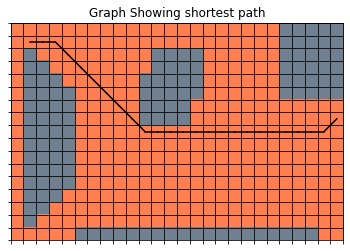

In [12]:
map_locations = [(5,1), (6,1), (7,1), (8,1), (9,1), (10,1), (11,1), (12,1), (13,1), (14,1),
                     (15,1),(16,1), (17,1),(18,1), (19,1), (20,1), (21,1), (22,1), (23,1),(21,11),
                     (22,11), (23,11), (24,11), (25,11), (1,12), (2,12), (3,12), (10,12), (11,12), 
                     (12,12), (13,12),(14, 12), (21, 12), (22, 12), (23, 12), (24, 12), (25, 12), 
                     (1,13), (2,13), (11,13), (12,13), (13,13),(1,2), (1,3), (2,3), (1,4), (2,4),
                     (3,4), (1,5), (2,5),(3,5), (4,5), (1,6), (2,6), (3,6), (4,6), (1,7), (2,7), 
                     (3,7),(12,10), (13,10), (1,11), (2,11), (3,11), (4,11), (10,11), (11,11), (12,11),
                     (13,11), (14,11), (14,13), (21,13), (22,13), (23,13), (24,13), (25,13), (1,14),
                     (11,14), (12,14), (13,14), (14,14),(21,14), (22,14), (23,14), (24,14), (25,14),
                     (21,15), (22,15), (23,15), (24,15), (25,15), (21,16),(22,16), (23,16), (24,16),
                     (25,16),(4,7), (1,8), (2,8), (3,8), (4,8), (1,9),(2,9), (3,9), (4,9), (10,9), 
                     (11,9), (12,9), (13,9), (1,10), (2,10), (3,10), (4,10), (10,10), 
                     (11,10)]
'''Using the top tuple way wasnt working, had to convert same way as hw2'''
maze= np.array([
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

def plot_maze(maze, path=None):    
    ''' visualize the binary `maze` (assumed numpy array) and solution `path` (if provided)'''


    nrow, ncol = maze.shape
    
    # create colormap
    cmap = colors.ListedColormap(['coral', 'slategray'])

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, origin='lower')
    
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k')
    ax.set_xticks(np.arange(-.5, ncol, 1))
    ax.set_yticks(np.arange(-.5, nrow, 1))
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    # now draw the solution path, if one is provided
    if path:
        for p in range(len(path)-1):
            point = path[p]
            nextpoint = path[p+1]
            plt.plot([point[0],nextpoint[0]], [point[1],nextpoint[1]], c='black')
    plt.title("Graph Showing shortest path")   
    plt.show()
 
#gives me a weird map
plot_maze(maze, path = astar_search((1, 15), (25, 9), heuristic_max))


---
## [50 pts] Problem 2:  Bayesian networks

#### Part A
In this problem, we are going to construct our own Bayesian Network. The probabilities are not given outright. You will use the data file mentioned below to determine the appropriate probability distributions for each node in the Bayes net. 

Suppose we are about to go on a run and are trying to decide how far to run. Consider the Bayesian network depicted below for this decision. The length of our run ($R$, miles) is continuous and depends on the temperature ($T$, degrees Fahrenheit), which is also a continuous variable, and whether or not it is raining ($P$), which is a discrete Boolean variable.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/running_bayesnet.png" style="width: 450px;"/>

1. Read in the data set [`data_running.csv`] from the Final Practicum Moodle folder. Read in the file as a pandas data frame.

Answer/Complete the following:
1. How many data points are there?
1. Make a histogram of the distribution of temperature, with appropriate axis labels.

In [13]:
#Reading in the data set 
data_frame = pd.read_csv("data_running.csv")
# data_frame.head(10)test to make sure data is running

In [14]:
# 1. How many data points are there?
data_frame_length = len(data_frame)
print("1. How many data points are there?")
print( data_frame_length, "data points")

1. How many data points are there?
200 data points


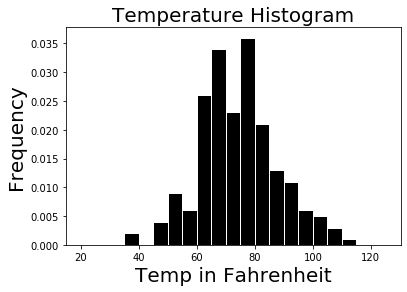

In [15]:
#2. Make a histogram of the distribution of temperature, with appropriate axis labels.
temp = data_frame["temperature"].tolist()
def histogram():
    #plot the histogram
    plt.hist(temp, bins=np.arange(20, 130, 5), facecolor='black', edgecolor = 'white', label='Data', density= 'True')
    #label x and y to correspond to data set
    plt.xlabel('Temp in Fahrenheit', fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    #title of histogram
    plt.title('Temperature Histogram',fontsize=20)
    #print the histogram
    plt.show()
histogram()

#### Part B

Using the data from the file in **Part A**, decide on appropriate prior distributions for $P$ and $T$.  Note that $P$ is discrete (Boolean), while $T$ is continuous.  

Further guidance on what I am asking:

So, for the distribution of $P$, you must determine P(P=True) and P(P=False). 

For T, study the histogram from **Part A**. Does the shape of the histogram remind you of any probability distribution you've seen before? We haven't seen a continuous probability distribution in class. However, the idea is the same as a discrete probability distribution. 

Continuous dsitributions you may or may not have encountered: Exponential, Uniform, Weibull, Normal, Chi-Squared, Logistic, Student-T, F. 

Choose a continuous distribution that fits $T$ and specify the appropriate parameters.


In [16]:
def distribution_p():
    #find the overall total of rain
    total_rain_prob = len(data_frame["rain"])
    #find the probability of true when there is rain
    prob_rain = len(data_frame.loc[data_frame["rain"]=="Yes"])/total_rain_prob
    #find the probability of false, when there is no rain
    prob_no_rain = len(data_frame.loc[data_frame["rain"]=="No"])/total_rain_prob
    # test
    # print(total_rain_prob)
    print("Probability that P(P = True):", prob_rain*100, "%")
    print("Probability that P(P = False):",prob_no_rain * 100, "%")
distribution_p()

Probability that P(P = True): 24.0 %
Probability that P(P = False): 76.0 %


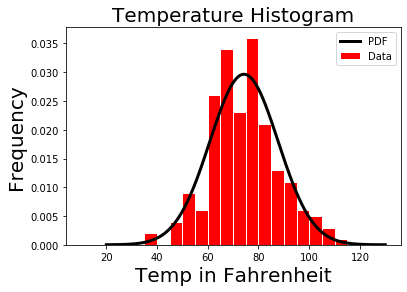

In [31]:
#for this we will use the same information from part A to get our best fit 
#we will use pdf equation to get our distribution

def continuous_distribution():
    #find our mu 
    mu = np.mean(data_frame['temperature'])
    #find the std
    std = np.std(data_frame['temperature'])
    pdf = stats.norm.pdf(np.linspace(20, 130, 1000), mu, std)


    #2. Make a histogram of the distribution of temperature, with appropriate axis labels.
    temp = data_frame["temperature"]

    #plot the histogram
    plt.hist(temp, bins=np.arange(10, 130, 5), facecolor='red', edgecolor = 'white', label='Data', density= 'True')
    plt.plot(np.linspace(20, 130, 1000), pdf, 'k', linewidth=3, label='PDF')
    #label x and y to correspond to data set
    plt.xlabel('Temp in Fahrenheit', fontsize=20)
    plt.ylabel('Frequency',fontsize=20)
    #title of histogram
    plt.title('Temperature Histogram',fontsize=20)
    #print the histogram
    plt.legend()
continuous_distribution()


#source
# http://danielhnyk.cz/fitting-distribution-histogram-using-python

#### Part C

Make two scatter plots:  one of the relationship between temperature (x-axis) and run length (y-axis) for only the days when it was raining, and one of this relationship for only the days when it was not raining. Label your axes appropriately. All of this data is contained in the csv file that you read in for **Part A**.


<Figure size 432x288 with 0 Axes>

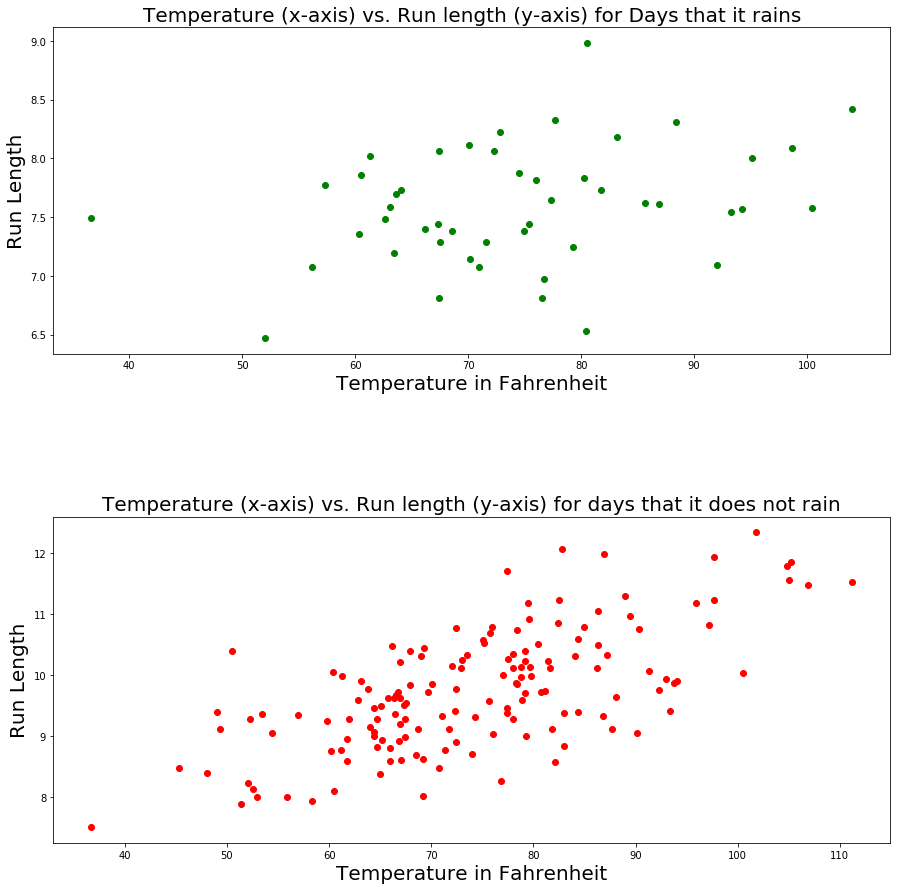

In [35]:
'''General use for both our scatter plots'''
#initialize our figure and subplots
figure = plt.figure()
#put the fiures side by side
figure, (axis1, axis2) = plt.subplots(nrows = 2, ncols = 1)
#set the size of our plots
figure.subplots_adjust(hspace = 0.5, wspace=0.5)
figure.set_size_inches(15, 15)


'''Scatter Plot code for days when it rains'''
def scatter_plot_one():
    days_raining = data_frame.loc[(data_frame["rain"] == "Yes")]
    days_raining_temp = days_raining['temperature']
    days_raining_length = days_raining['length']
    
    #plot our data, using axis[0] to use the first scatter plot
    axis1.scatter(days_raining_temp, days_raining_length, facecolor='green')
    
    #label our scatter plot 
    axis1.set_title('Temperature (x-axis) vs. Run length (y-axis) for Days that it rains', fontsize=20)
    axis1.set_xlabel('Temperature in Fahrenheit', fontsize=20)
    axis1.set_ylabel('Run Length', fontsize=20)
#     plt.show()

'''Scatter Plot code for days when it doesnt rain'''
def scatter_plot_two():
    days_not_raining = data_frame.loc[(data_frame["rain"] == "No")]
    days_not_raining_temp = days_not_raining['temperature']
    days_not_raining_length = days_not_raining['length']
    
    #plot our data, using axis[0] to use the first scatter plot
    axis2.scatter(days_not_raining_temp, days_not_raining_length, facecolor='red')
    
    #label our scatter plot 
    axis2.set_title('Temperature (x-axis) vs. Run length (y-axis) for days that it does not rain', fontsize=20)
    axis2.set_xlabel('Temperature in Fahrenheit', fontsize=20)
    axis2.set_ylabel('Run Length', fontsize=20)
#     plt.show()
    
scatter_plot_one()
scatter_plot_two()
plt.show()

#### Part D:

This part is done for you as we didn't explicitly talk about regression in this class. Regression is likely a concept you've encountered in previous classes, so please review what's done here and make sure you understand before proceeding.

Now, we need to specify the Conditional Probability table for Run length, R. Run length is necessarily non-negative, so we use a log-normal distribution as the conditional probability distribution for $R$, given $P$ and $T$. Let the log-normal parameter related to central tendency vary linearly with $T$, and categorically depending on whether or not it is raining. Keep the log-normal parameter related to distribution spread fixed. 

Lastly, we report the values of all relevant estimated parameters for the conditional probability distribution. 

In [19]:

# We are doing a simple linear regression for log(R) = alpha + beta*T, 
# where different alpha and beta are estimated for +Rain and -Rain.

lr_no = stats.linregress(data_frame.loc[data_frame['rain']=='No','temperature'], np.log(data_frame.loc[data_frame['rain']=='No','length']))
lr_yes = stats.linregress(data_frame.loc[data_frame['rain']=='Yes','temperature'], np.log(data_frame.loc[data_frame['rain']=='Yes','length']))
alpha_no, beta_no = lr_no.intercept, lr_no.slope
alpha_yes, beta_yes = lr_yes.intercept, lr_yes.slope
sigma = np.std(np.log(data_frame['length']))

# report the parameter fits
print('Log-linear regression with no rain: intercept={:0.4f}, slope={:0.4f}'.format(alpha_no, beta_no))
print('Log-linear regression with rain: intercept={:0.4f}, slope={:0.4f}'.format(alpha_yes, beta_yes))
print('Estimate of spread, regardless of rain: {:0.4f}'.format(sigma))

Log-linear regression with no rain: intercept=1.9087, slope=0.0049
Log-linear regression with rain: intercept=1.9185, slope=0.0014
Estimate of spread, regardless of rain: 0.1396


#### Part E

The following code graphs out conditional probability distributions for R given a specific temperature and rain versus no rain. 

Specifically the graphs show the probability distributions for your run length on a day that is 80 degrees Fahrenheit and not raining, as well as run length on an 80-degree day when it is raining.  These two distributions are plotted on the same set of axes, with run length (miles) on the x-axis and probability density on the y-axis. 

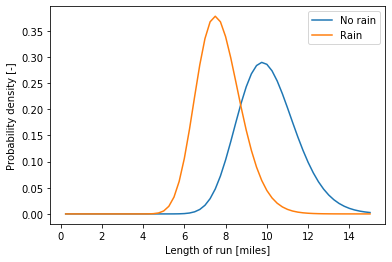

In [20]:
r = np.arange(0.25,15.25,0.25)
mu_no = alpha_no + beta_no*80
pdf_no = [stats.lognorm.pdf(x=rx, scale=np.exp(mu_no), s=sigma) for rx in r]
mu_yes = alpha_yes + beta_yes*80
pdf_yes = [stats.lognorm.pdf(x=rx, scale=np.exp(mu_yes), s=sigma) for rx in r]

plt.plot(r, pdf_no, label='No rain')
plt.plot(r, pdf_yes, label='Rain')
plt.xlabel('Length of run [miles]')
plt.ylabel('Probability density [-]')
plt.legend()
plt.show()



Given this, find the following:
- $P(R = 8 | P=T, Temp = 70)$
- $P(R = 8 | P=F, Temp = 70)$

Note: What's given about is an example of all of the probability values for R when the temperature is 80 degrees. Your task is to figure out how to compute the specific probabilities I've asked about.

In [21]:
# Your code here used code from above 
r = np.arange(0.25,15.25,0.25)
mu_no = alpha_no + beta_no*70
pdf_no = [stats.lognorm.pdf(x=8, scale=np.exp(mu_no), s=sigma) for x in r]
mu_yes = alpha_yes + beta_yes*70
pdf_yes = [stats.lognorm.pdf(x=8, scale=np.exp(mu_yes), s=sigma) for x in r]

print("P(R = 8 | P=T, Temp = 70): ",pdf_no[31]*100, "%")

print("P(R = 8 | P=F, Temp = 70): ",pdf_yes[31]*100, "%")

P(R = 8 | P=T, Temp = 70):  16.837493491904546 %
P(R = 8 | P=F, Temp = 70):  32.574771542258254 %



#### Part F

If you made it this far, we now have a working Bayesian Network with the CPTs specified!

Now we will get a chance to actually perform sampling from a Bayesian Network. I briefly talked about this in lecture, but I will walk you through the steps. It's a really cool way to use a Bayesian Network. Please read the comments in the code below and fill in where indicated. Specifically, look for the "# Your code here." comments.

We are going to estimate the probability of going on a run **at least** 8 miles in length. 

In [33]:
# We will be taking 10,000 random samples from our Bayesian Network.
n_iter = 10000

# The following line is specifying the threshold run length.
rlength = 8

# Select 10,000 random samples from P prior
# So that we all have the similar answers, set P(rain=True) = 0.3 and
# set P(rain=False) = 0.7
# Hint: you are sampling from a Boolean array with the specified 
# probabilities.
rain = np.random.choice([True, False], 10000, [0.3, 0.7])# Your code here.

# Select 10,000 random samples from T prior
temp = np.random.normal(np.mean(data_frame['temperature']), np.std(data_frame['temperature']), 10000)

# sample from R | P,T conditional distribution
# Done for you.
run_length = []
for k in range(n_iter):
    mu = alpha_yes + beta_yes*temp[k] if rain[k] else alpha_no + beta_no*temp[k]
    run_length.append(stats.lognorm.rvs(scale=np.exp(mu), s=sigma))

# Create a data frame with columns for rain, temp, and length. 
# The values from the rain column should be the random samples from above.
# The values from the temp column should be the random samples above.
# The values in the length column should be the run_length values from above.

dfSample = [i for i in run_length if i >= 8]

# Using your dfSample dataframe, compute the probability of a run
# greater than or equal to 8 miles.
print("The probability of going on at least 8 miles:", len(dfSample)/len(run_length))
# Your code here.

The probability of going on at least 8 miles: 0.6252
